<a href="https://colab.research.google.com/github/joeyee614/KNN/blob/main/week6_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries for ML

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'
import sklearn

<ipython-input-8-80251e261d76>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab  import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('cp1252')))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.describe().round(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
df.shape

(150, 5)

In [ ]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [ ]:
feature_collumns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df[feature_collumns].values
y = df['species'].values

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()
y = le.fit_transform(y)
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Pairplot Graph

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import markers

<Figure size 800x550 with 0 Axes>

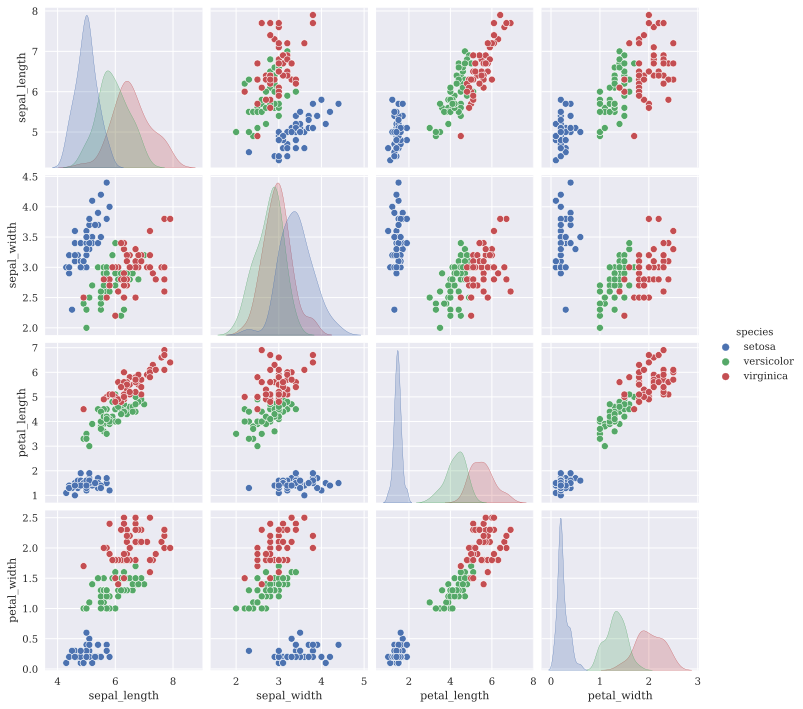

In [ ]:
plt.figure()
sns.pairplot(df, hue = "species")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print ('Accuracy of our model is equal' + str(round(accuracy, 2))+ '%.')

Accuracy of our model is equal96.67%.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(x[:, 0], x[:, 1], x[:, 2],c='blue',
           cmap=plt.cm.Set1, edgecolor='k', s=x[:,3]*50)

<ipython-input-64-cb52eb6deec7>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[:, 0], x[:, 1], x[:, 2],c='blue',


<Figure size 2000x1500 with 0 Axes>

In [ ]:
for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolor', 2)]:
  ax.text3D(x[y == label, 0].mean(),
            x[y == label, 1].mean(),
            x[y == label, 2].mean(), 'species',
            horizontalalignment = 'center',
            bbox=dict(alpha=.5, edgecolor='w',facecolor='w'), size=25)

In [ ]:
ax.set_title('3D visualization', fontsize=40)
ax.set_xlabel('Sepal Length[cm]', fontsize=25)
ax.xaxis.set_ticklabels([])
ax.set_ylabel('Sepal Width[cm]', fontsize=25)
ax.yaxis.set_ticklabels([])
ax.set_zlabel('Petal Length [cm]', fontsize=25)
ax.zaxis.set_ticklabels([])

plt.show()